### Engagement Statistics

In [58]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

np.random.seed(42)
sns.set_context('paper')

In [59]:
data = pd.read_csv('data/ues_responses.csv')
data[['FA-Score', 'AE-Score', 'PU-Score', 'RW-Score', 'UES-Score']].describe()

,FA-Score,AE-Score,PU-Score,RW-Score,UES-Score
count,40.000000,40.000000,40.000000,40.000000,40.000000
mean,3.324750,3.635000,3.062500,3.197500,3.305000
std,0.866762,0.860396,1.053876,0.952591,0.817291
min,1.000000,1.200000,1.120000,1.000000,1.080000
25%,2.927500,3.200000,2.315000,2.575000,2.837500
50%,3.430000,3.600000,3.060000,3.300000,3.280000
75%,3.860000,4.250000,4.000000,3.950000,3.910000
max,4.710000,5.000000,5.000000,4.800000,4.820000


In [60]:
data.columns

Index(['Unnamed: 0', 'pid', 'Age', 'Gender', 'Education', 'Employment', 'Tech',
       'Origami', 'Consumption', 'source', 'bbc_id', 'FA2', 'AE3', 'FA4',
       'AE4', 'RW1', 'RW5', 'RW8', 'RW2', 'RW3', 'RW7', 'PU6', 'FA1', 'PU2',
       'RW9', 'FA7', 'PU7', 'PU4', 'FA6', 'AE5', 'PU1', 'AE1', 'PU8', 'RW6',
       'AE2', 'FA3', 'RW10', 'RW4', 'FA5', 'PU5', 'PU3', 'complete_frog',
       'FA-Score', 'AE-Score', 'PU-Score', 'RW-Score', 'UES-Score',
       'engagement_level'],
      dtype='object')

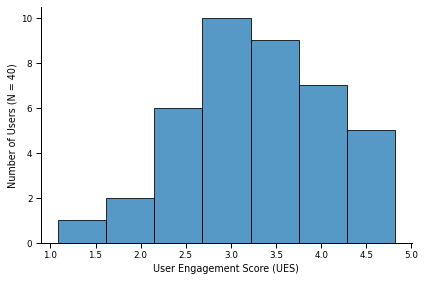

In [61]:
p = sns.histplot(data['UES-Score'], palette = sns.color_palette('colorblind'))
p.set(ylabel = f"Number of Users (N = {len(data.index)})", xlabel = 'User Engagement Score (UES)')

sns.despine()
plt.tight_layout()
plt.show()
# plt.savefig('plots/ues-distribution.png')

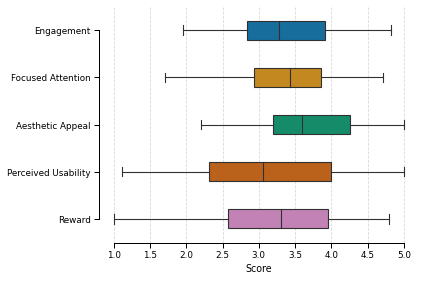

In [62]:
p = sns.boxplot(
    data = data[['UES-Score', 'FA-Score', 'AE-Score', 'PU-Score', 'RW-Score']], 
    width = 0.4, linewidth = 1.1, notch = False, orient = 'h', showfliers = False, 
    palette = sns.color_palette('colorblind')
)
p.set(
    xlabel = 'Score', 
    yticklabels = [
        'Engagement', 'Focused Attention', 'Aesthetic Appeal', 'Perceived Usability', 'Reward'
    ]
)
p.xaxis.grid(True, alpha = 0.5, linestyle = 'dashed')
p.set_axisbelow(True)
sns.despine(trim = True)
plt.tight_layout()
plt.show()
# plt.savefig('plots/ues-distributions-boxplot.png')

**Add group identifiers into the data**

In [63]:
data['previous_origami_experience'] = np.where(
    data['Origami'].isin(['Novice', 'Intermediate', 'Advanced', 'Expert']), 
    'With Experience',
    'No Experience'
)
data['previous_tech_experience'] = np.where(
    data['Tech'].isin(['None', 'Novice', 'Intermediate']),
    'Little to None',
    'Advanced to Expert'
)

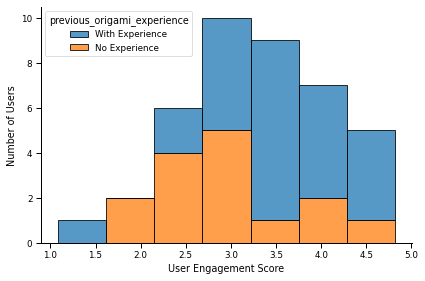

In [64]:
p = sns.histplot(
    x = 'UES-Score', hue = 'previous_origami_experience', data = data,
    multiple = 'stack'
)
p.set(xlabel = 'User Engagement Score', ylabel = 'Number of Users')

sns.despine()
plt.tight_layout()
plt.show()

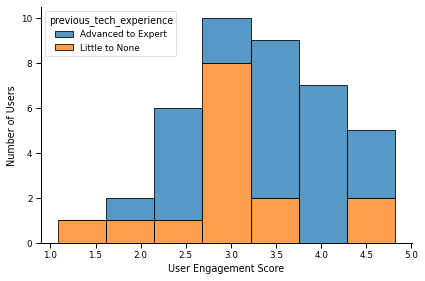

In [65]:
p = sns.histplot(
    x = 'UES-Score', hue = 'previous_tech_experience', data = data,
    multiple = 'stack'
)
p.set(xlabel = 'User Engagement Score', ylabel = 'Number of Users')

sns.despine()
plt.tight_layout()
plt.show()

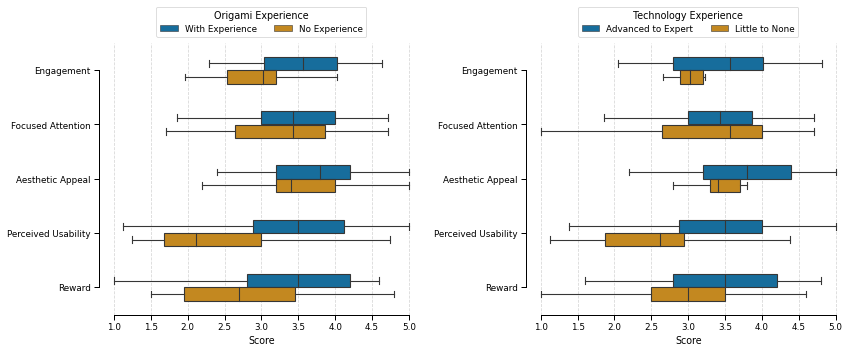

In [66]:
fig, axes = plt.subplots(ncols = 2, nrows = 1, figsize = (12, 5))
legend_titles = {
    'previous_origami_experience': 'Origami Experience', 
    'previous_tech_experience': 'Technology Experience'
}

for indx, col in enumerate(['previous_origami_experience', 'previous_tech_experience']):
    p = sns.boxplot(
        data = pd.melt(
            data, id_vars = col, 
            value_vars = ['UES-Score', 'FA-Score', 'AE-Score', 'PU-Score', 'RW-Score'], 
            var_name = 'metric', value_name = 'metric_score'
        ),
        x = 'metric_score', y = 'metric', hue = col,
        width = 0.5, linewidth = 1.1, notch = False, orient = 'h', showfliers = False,
        palette = sns.color_palette('colorblind'),
        ax = axes[indx]
    )
    p.set(
        xlabel = 'Score',
        ylabel = '',
        yticklabels = [
            'Engagement', 'Focused Attention', 'Aesthetic Appeal', 'Perceived Usability', 'Reward'
        ]
    )
    p.xaxis.grid(True, alpha = 0.5, linestyle = 'dashed')
    p.set_axisbelow(True)
    p.legend(title = legend_titles[col], loc = 'upper center', bbox_to_anchor = (0.5, 1.15), ncol = 2)

sns.despine(trim = True)
plt.tight_layout()
plt.show()
# plt.savefig('plots/ues-distributions-demographics.png')

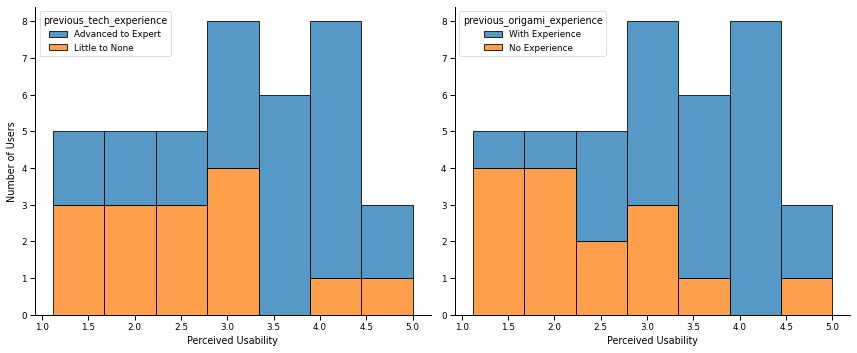

In [67]:
fig, axes = plt.subplots(ncols = 2, figsize = (12, 5))

p = sns.histplot(
    x = 'PU-Score', hue = 'previous_tech_experience', data = data,
    multiple = 'stack', ax = axes[0]
)
p.set(xlabel = 'Perceived Usability', ylabel = 'Number of Users')
q = sns.histplot(
    x = 'PU-Score', hue = 'previous_origami_experience', data = data,
    multiple = 'stack', ax = axes[1]
)
q.set(xlabel = 'Perceived Usability', ylabel = '')

sns.despine()
plt.tight_layout()
plt.show()

In [68]:
import pingouin as pg 

print('Origami Experience')
for val in ['With Experience', 'No Experience']:
    print(val)
    print(pg.normality(data[data['previous_origami_experience'] == val]['UES-Score']))

print('\nTechnical Experience')
for val in ['Advanced to Expert', 'Little to None']:
    print(val)
    print(pg.normality(data[data['previous_tech_experience'] == val]['UES-Score']))

Origami Experience
With Experience
                  W      pval  normal
UES-Score  0.936505  0.122889    True
No Experience
                  W      pval  normal
UES-Score  0.937796  0.355459    True

Technical Experience
Advanced to Expert
                  W      pval  normal
UES-Score  0.956855  0.355404    True
Little to None
                  W      pval  normal
UES-Score  0.903472  0.107551    True


In [69]:
# Test for variance equality, to determine the type of test performed.
print('Origami Experience')
print(pg.homoscedasticity(
    data = data, dv = 'UES-Score', group = 'previous_origami_experience', alpha = 0.05
))
print(pg.homoscedasticity(
    data = data, dv = 'UES-Score', group = 'previous_tech_experience', alpha = 0.05
))

Origami Experience
               W     pval  equal_var
levene  0.003104  0.95586       True
               W      pval  equal_var
levene  0.314113  0.578457       True


In [70]:
pg.anova(
    dv = 'UES-Score', between = 'previous_origami_experience', data = data
)

,Source,ddof1,ddof2,F,p-unc,np2
0,previous_origami_experience,1,38,3.295944,0.077349,0.079813


In [71]:
pg.anova(
    dv = 'UES-Score', between = 'previous_tech_experience', data = data
)

,Source,ddof1,ddof2,F,p-unc,np2
0,previous_tech_experience,1,38,2.237249,0.14298,0.055601


In [72]:
print('Origami Experience')
for val in ['With Experience', 'No Experience']:
    print(val)
    print(pg.normality(data[data['previous_origami_experience'] == val]['PU-Score']))

print('\nTechnical Experience')
for val in ['Advanced to Expert', 'Little to None']:
    print(val)
    print(pg.normality(data[data['previous_tech_experience'] == val]['PU-Score']))

Origami Experience
With Experience
                 W     pval  normal
PU-Score  0.968575  0.60919    True
No Experience
                 W      pval  normal
PU-Score  0.925966  0.237317    True

Technical Experience
Advanced to Expert
                 W      pval  normal
PU-Score  0.965366  0.531262    True
Little to None
                W     pval  normal
PU-Score  0.93874  0.36679    True


In [73]:
# Test for variance equality, to determine the type of test performed.
print('Origami Experience')
print(pg.homoscedasticity(
    data = data, dv = 'UES-Score', group = 'previous_origami_experience', alpha = 0.05
))
print(pg.homoscedasticity(
    data = data, dv = 'UES-Score', group = 'previous_tech_experience', alpha = 0.05
))

Origami Experience
               W     pval  equal_var
levene  0.003104  0.95586       True
               W      pval  equal_var
levene  0.314113  0.578457       True


In [74]:
print('PU')
print(pg.homoscedasticity(
    data = data, dv = 'PU-Score', group = 'previous_origami_experience', alpha = 0.05
))
print(pg.homoscedasticity(
    data = data, dv = 'PU-Score', group = 'previous_tech_experience', alpha = 0.05
))

PU
               W      pval  equal_var
levene  0.091393  0.764063       True
               W      pval  equal_var
levene  0.006269  0.937305       True


In [75]:
pg.anova(dv = 'PU-Score', between = 'previous_tech_experience', data = data)

,Source,ddof1,ddof2,F,p-unc,np2
0,previous_tech_experience,1,38,6.472058,0.015146,0.145531


In [76]:
pg.anova(dv = 'PU-Score', between = 'previous_origami_experience', data = data)

,Source,ddof1,ddof2,F,p-unc,np2
0,previous_origami_experience,1,38,10.333031,0.002666,0.213788


**Testing for significant differences between the UES factors (tech experience)**

In [77]:
from lib.helpers import ues_difference_check

print('UES-Score')
print(ues_difference_check(data = data, dv = 'UES-Score', group = 'previous_tech_experience'))

print('\nFocused Attention')
print(ues_difference_check(data = data, dv = 'FA-Score', group = 'previous_tech_experience'))

print('\nAesthetic Appeal')
print(ues_difference_check(data = data, dv = 'AE-Score', group = 'previous_tech_experience'))

print('\nPerceived Usability')
print(ues_difference_check(data = data, dv = 'PU-Score', group = 'previous_tech_experience'))

print('\nReward')
print(ues_difference_check(data = data, dv = 'RW-Score', group = 'previous_tech_experience'))


UES-Score
(                     Source  ddof1  ddof2         F    p-unc       np2
0  previous_tech_experience      1     38  2.237249  0.14298  0.055601, {'normal': True, 'equal_var': True, 'sig_level': 'not significant'})

Focused Attention
(                     Source  ddof1  ddof2         F     p-unc       np2
0  previous_tech_experience      1     38  0.074118  0.786906  0.001947, {'normal': True, 'equal_var': True, 'sig_level': 'not significant'})

Aesthetic Appeal
(     U-val       tail     p-val    RBC   CLES
MWU  223.5  two-sided  0.319578 -0.192  0.596, {'normal': False, 'equal_var': True, 'sig_level': 'not significant'})

Perceived Usability
(                     Source  ddof1  ddof2         F     p-unc       np2
0  previous_tech_experience      1     38  6.472058  0.015146  0.145531, {'normal': True, 'equal_var': True, 'sig_level': 'significant at < 0.05'})

Reward
(                     Source  ddof1  ddof2         F     p-unc       np2
0  previous_tech_experience      1    

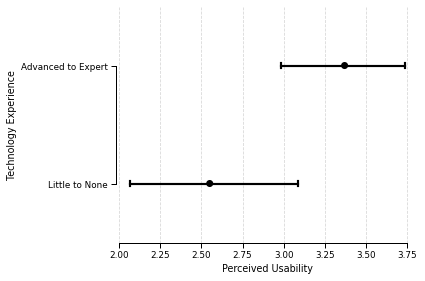

In [78]:
p = sns.pointplot(
    y = 'previous_tech_experience', 
    x = 'PU-Score', 
    data = data, 
    join = False, 
    capsize = 0.05, 
    color = 'black', 
    orient = 'h'
)
p.set(xlabel = 'Perceived Usability', ylabel = 'Technology Experience')
p.xaxis.grid(True, alpha = 0.5, linestyle = 'dashed')
sns.despine(trim = True)
plt.tight_layout()
plt.show()
# plt.savefig('plots/tech-experience-pu-pointplot.png')

**Testing for significance differences between the UES factors for the origami experience**

In [79]:
from lib.helpers import ues_difference_check

print('UES-Score')
print(ues_difference_check(data = data, dv = 'UES-Score', group = 'previous_origami_experience'))

print('\nFocused Attention')
print(ues_difference_check(data = data, dv = 'FA-Score', group = 'previous_origami_experience'))

print('\nAesthetic Appeal')
print(ues_difference_check(data = data, dv = 'AE-Score', group = 'previous_origami_experience'))

print('\nPerceived Usability')
print(ues_difference_check(data = data, dv = 'PU-Score', group = 'previous_origami_experience'))

print('\nReward')
print(ues_difference_check(data = data, dv = 'RW-Score', group = 'previous_origami_experience'))


UES-Score
(                        Source  ddof1  ddof2         F     p-unc       np2
0  previous_origami_experience      1     38  3.295944  0.077349  0.079813, {'normal': True, 'equal_var': True, 'sig_level': 'not significant'})

Focused Attention
(                        Source  ddof1  ddof2         F     p-unc       np2
0  previous_origami_experience      1     38  0.293613  0.591078  0.007667, {'normal': True, 'equal_var': True, 'sig_level': 'not significant'})

Aesthetic Appeal
(                        Source  ddof1  ddof2         F     p-unc       np2
0  previous_origami_experience      1     38  0.073939  0.787158  0.001942, {'normal': True, 'equal_var': True, 'sig_level': 'not significant'})

Perceived Usability
(                        Source  ddof1  ddof2          F     p-unc       np2
0  previous_origami_experience      1     38  10.333031  0.002666  0.213788, {'normal': True, 'equal_var': True, 'sig_level': 'significant at < 0.05'})

Reward
(                        Source 

In [80]:
print(pg.homoscedasticity(
    data = data, dv = 'RW-Score', group = 'previous_origami_experience', alpha = 0.05
))

               W      pval  equal_var
levene  0.106042  0.746482       True


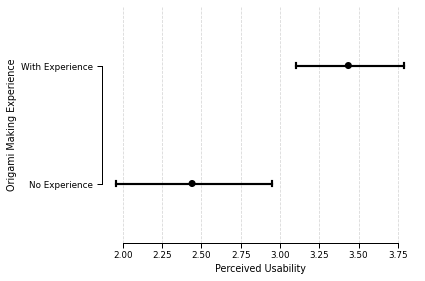

In [81]:
p = sns.pointplot(
    y = 'previous_origami_experience', 
    x = 'PU-Score', 
    data = data, 
    join = False, 
    capsize = 0.05, 
    color = 'black', 
    orient = 'h'
)
p.set(xlabel = 'Perceived Usability', ylabel = 'Origami Making Experience')
p.xaxis.grid(True, alpha = 0.5, linestyle = 'dashed')
sns.despine(trim = True)
plt.tight_layout()
plt.show()
# plt.savefig('plots/origami-experience-pu-pointplot')

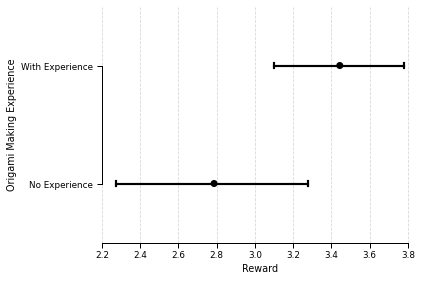

In [82]:
p = sns.pointplot(
    y = 'previous_origami_experience', 
    x = 'RW-Score', 
    data = data, 
    join = False, 
    capsize = 0.05, 
    color = 'black', 
    orient = 'h'
)
p.set(xlabel = 'Reward', ylabel = 'Origami Making Experience')
p.xaxis.grid(True, alpha = 0.5, linestyle = 'dashed')
sns.despine(trim = True)
plt.tight_layout()
plt.show()
# plt.savefig('plots/origami-making-rw-pointplot.png')

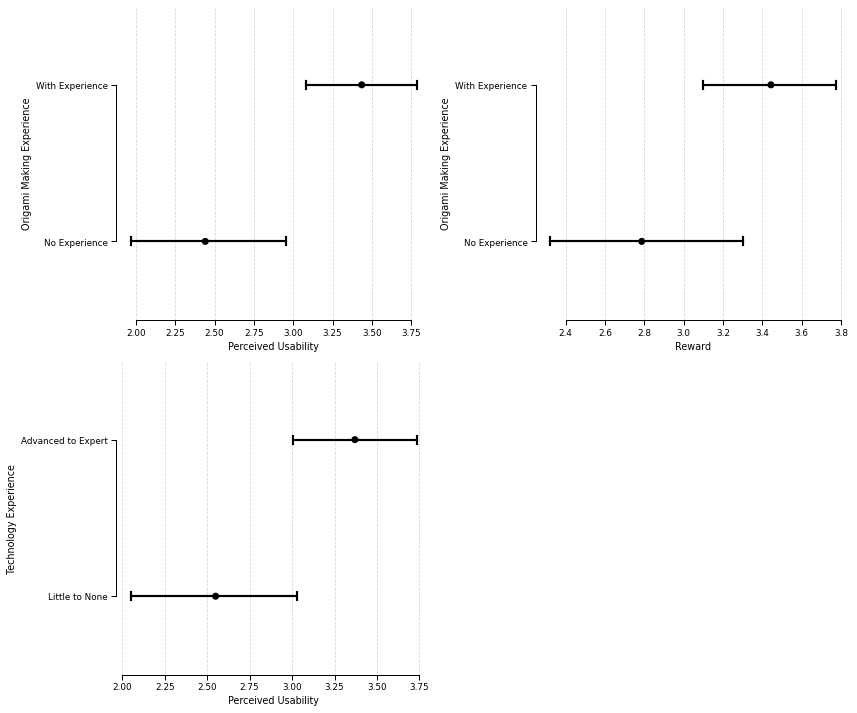

In [85]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 10))
fig.delaxes(axes[1, 1])

a = sns.pointplot(
    y = 'previous_origami_experience', x = 'PU-Score', data = data, join = False, capsize = 0.05, 
    color = 'black', orient = 'h', ax = axes[0, 0]
)
a.set(xlabel = 'Perceived Usability', ylabel = 'Origami Making Experience')
a.xaxis.grid(True, alpha = 0.5, linestyle = 'dashed')

b = sns.pointplot(
    y = 'previous_origami_experience', x = 'RW-Score', data = data, join = False, capsize = 0.05, 
    color = 'black', orient = 'h', ax = axes[0, 1]
)
b.set(xlabel = 'Reward', ylabel = 'Origami Making Experience')
b.xaxis.grid(True, alpha = 0.5, linestyle = 'dashed')

b = sns.pointplot(
    y = 'previous_tech_experience', x = 'PU-Score', data = data, join = False, capsize = 0.05, 
    color = 'black', orient = 'h', ax = axes[1, 0]
)
b.set(xlabel = 'Perceived Usability', ylabel = 'Technology Experience')
b.xaxis.grid(True, alpha = 0.5, linestyle = 'dashed')

sns.despine(trim = True)
plt.tight_layout()
plt.show()
# plt.savefig('plots/demographic-effects-pointplot.png')

In [63]:
from lib.helpers import significance_level

pairwise_correlation = pg.pairwise_corr(
    data = data, method = 'spearman', padjust = 'bonf',
    columns = ['FA-Score', 'AE-Score', 'PU-Score', 'RW-Score']
)
pairwise_correlation['significance_level'] = pairwise_correlation['p-corr'].apply(significance_level)
pairwise_correlation

,X,Y,method,tail,n,r,CI95%,p-unc,p-corr,p-adjust,power,significance_level
0,FA-Score,AE-Score,spearman,two-sided,40,0.582248,"[0.33, 0.76]",8.102142e-05,4.861285e-04,bonf,0.983511,significant at < 0.001
1,FA-Score,PU-Score,spearman,two-sided,40,0.450899,"[0.16, 0.67]",3.500534e-03,2.100320e-02,bonf,0.847797,significant at < 0.05
2,FA-Score,RW-Score,spearman,two-sided,40,0.514495,"[0.24, 0.71]",6.827668e-04,4.096601e-03,bonf,0.937832,significant at < 0.05
3,AE-Score,PU-Score,spearman,two-sided,40,0.680273,"[0.47, 0.82]",1.373055e-06,8.238329e-06,bonf,0.999144,significant at < 0.001
4,AE-Score,RW-Score,spearman,two-sided,40,0.833980,"[0.71, 0.91]",2.349258e-11,1.409555e-10,bonf,1.000000,significant at < 0.001
5,PU-Score,RW-Score,spearman,two-sided,40,0.822288,"[0.69, 0.9]",7.681482e-11,4.608889e-10,bonf,1.000000,significant at < 0.001


**Defining classification groups (using the median)**

In [65]:
for factor in ['FA', 'AE', 'PU', 'RW']:
    data[f"{factor}-Group"] = np.where(
        data[f"{factor}-Score"] <= data[f"{factor}-Score"].median(), 'Low', 'High'
    )
data[['FA-Group', 'AE-Group', 'PU-Group', 'RW-Group']].describe()

,FA-Group,AE-Group,PU-Group,RW-Group
count,40,40,40,40
unique,2,2,2,2
top,Low,Low,High,High
freq,21,22,20,20
